## 가상데이터생성 (CTGAN)

In [1]:
import torch
torch.cuda.current_device()

0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time
import pickle
from collections import defaultdict
from itertools import islice, combinations
from datetime import datetime as dt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

from ctgan import CTGANSynthesizer
# 폰트 적용
plt.rcParams['font.family'] = 'Malgun Gothic'


In [3]:
# GPU 메모리문제 해결
import torch,gc
gc.collect()
torch.cuda.empty_cache()

In [4]:
#주피터 셀 전체화면보기
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# 주피터 한 셀에 입력된 수시과 함수의 결과를 모두출력(선택사용)
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
## 각 컬럼 width 최대로
pd.set_option('display.max_colwidth', -1)
## rows 500
pd.set_option('display.max_rows', 500)
## columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print('ready to run')
# 전체 시작시간 로깅
startTime = time.time()

ready to run


In [5]:
import os
import pickle

## 우범여부를 기준으로 데이터프레임 분할

In [9]:
# load and uncompress.
df_raw=pd.read_csv('./month/total.csv', encoding='utf-8-sig')

In [10]:
df_org_merge=df_raw[['신고번호', '신고일자', '신고세관부호', '수입신고구분코드', '수입거래구분코드', '수입종류코드', '징수형태코드', '운송수단유형코드', '신고인부호', '수입자', '해외거래처부호','특송업체부호', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율', '관세율구분코드', '원산지표시유무코드', '신고중량(KG)', '과세가격원화금액', '우범여부', '핵심적발']]

In [11]:
df_org_merge['신고일자']=df_org_merge['신고일자'].astype(str)
df_org_merge['신고일자']=pd.to_datetime(df_org_merge['신고일자'])
df_org=df_org_merge.drop_duplicates(['신고번호'], keep='first')
df_org=df_org.sort_values(by=['신고일자'], axis = 0)

In [20]:
df_org.columns

Index(['신고번호', '신고일자', '신고세관부호', '수입신고구분코드', '수입거래구분코드', '수입종류코드', '징수형태코드', '운송수단유형코드', '신고인부호', '수입자', '해외거래처부호', '특송업체부호', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율', '관세율구분코드', '원산지표시유무코드', '신고중량(KG)', '과세가격원화금액', '우범여부', '핵심적발'], dtype='object')

In [21]:
df_sample=df_org.sample(3000,replace=False)

In [22]:
df_sample.to_csv('./data_sample/df_sample_01.csv', index=False, encoding='utf-8-sig')

In [23]:
# 컬럼 합치기
cols = ['HS10단위부호', '적출국가코드', '원산지국가코드', '관세율', '관세율구분코드', '신고중량(KG)','우범여부', '핵심적발']
df_sample['HS10_적_원_율_구_중_우_핵'] =df_sample[cols].apply(lambda row: '^'.join(row.values.astype(str)), axis=1)
df_sample=df_sample.drop(cols, axis=1)
df_sample=df_sample.drop(['과세가격원화금액'], axis=1)

In [25]:
df_sample.dtypes

신고번호                  int64         
신고일자                  datetime64[ns]
신고세관부호                int64         
수입신고구분코드              object        
수입거래구분코드              int64         
수입종류코드                int64         
징수형태코드                int64         
운송수단유형코드              int64         
신고인부호                 object        
수입자                   object        
해외거래처부호               object        
특송업체부호                object        
원산지표시유무코드             object        
HS10_적_원_율_구_중_우_핵    object        
dtype: object

In [26]:
df_sample['신고일자']=df_sample['신고일자'].astype('str')

In [28]:
categorical_columns =[ '신고번호', '신고일자','수입신고구분코드','신고인부호','수입자','해외거래처부호','특송업체부호','원산지표시유무코드','HS10_적_원_율_구_중_우_핵']

In [29]:
from ctgan import CTGANSynthesizer
from ctgan import load_demo

In [32]:
# 가상데이터 생성기
ctgan = CTGANSynthesizer(verbose=True)
ctgan.fit(df_sample, categorical_columns, epochs = 100)

Epoch 1, Loss G:  5.3592,Loss D: -0.1240
Epoch 2, Loss G:  5.4703,Loss D: -0.2332
Epoch 3, Loss G:  5.5018,Loss D: -0.2819
Epoch 4, Loss G:  5.4414,Loss D: -0.2830
Epoch 5, Loss G:  5.3600,Loss D: -0.3872
Epoch 6, Loss G:  5.2567,Loss D: -0.4319
Epoch 7, Loss G:  5.5430,Loss D: -0.4848
Epoch 8, Loss G:  5.5439,Loss D: -0.5703
Epoch 9, Loss G:  5.4590,Loss D: -0.5240
Epoch 10, Loss G:  5.5772,Loss D: -0.4643
Epoch 11, Loss G:  5.4801,Loss D: -0.4329
Epoch 12, Loss G:  5.2539,Loss D: -0.3303
Epoch 13, Loss G:  5.1778,Loss D: -0.1697
Epoch 14, Loss G:  4.8543,Loss D:  0.0526
Epoch 15, Loss G:  5.2357,Loss D: -0.0107
Epoch 16, Loss G:  4.8334,Loss D: -0.0355
Epoch 17, Loss G:  5.0521,Loss D:  0.0022
Epoch 18, Loss G:  4.7346,Loss D:  0.0723
Epoch 19, Loss G:  4.7487,Loss D:  0.1009
Epoch 20, Loss G:  4.4323,Loss D:  0.1800
Epoch 21, Loss G:  4.8012,Loss D:  0.1101
Epoch 22, Loss G:  4.7866,Loss D:  0.0331
Epoch 23, Loss G:  4.1800,Loss D:  0.0676
Epoch 24, Loss G:  4.5198,Loss D:  0.1351
E

In [33]:
# GPU 메모리문제 해결
import torch,gc
gc.collect()
torch.cuda.empty_cache()

In [34]:
count_row = df_sample.shape[0] 

In [35]:
# 가상데이터 생성count_row
df_syn = ctgan.sample(count_row)

In [37]:
cols = ['HS10단위부호', '적출국가코드', '원산지국가코드', '관세율', '관세율구분코드', '신고중량(KG)','우범여부', '핵심적발']

In [38]:
df_syn['HS10단위부호']=df_syn.HS10_적_원_율_구_중_우_핵.str.split('^').str[0]
df_syn['적출국가코드']=df_syn.HS10_적_원_율_구_중_우_핵.str.split('^').str[1]
df_syn['원산지국가코드']=df_syn.HS10_적_원_율_구_중_우_핵.str.split('^').str[2]
df_syn['관세율']=df_syn.HS10_적_원_율_구_중_우_핵.str.split('^').str[3]
df_syn['관세율구분코드']=df_syn.HS10_적_원_율_구_중_우_핵.str.split('^').str[4]
df_syn['신고중량(KG)']=df_syn.HS10_적_원_율_구_중_우_핵.str.split('^').str[5]
df_syn['우범여부']=df_syn.HS10_적_원_율_구_중_우_핵.str.split('^').str[6]
df_syn['핵심적발']=df_syn.HS10_적_원_율_구_중_우_핵.str.split('^').str[7]

In [39]:
df_syn = df_syn.drop(['HS10_적_원_율_구_중_우_핵'],axis=1)

In [40]:
df_syn

,신고번호,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,수입자,해외거래처부호,특송업체부호,원산지표시유무코드,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,신고중량(KG),우범여부,핵심적발
0,62882487,2020-10-08,67,B,11,21,11,40,SPUZ923,SZPFZPG,A70MDRN,NaN,B,3920100000,CN,CN,3.9,FCN1,18250.0,1,1
1,8225557,2020-12-04,21,B,11,21,11,10,ZQJIYI3,OPXBPE0,NPKQ6XY,NaN,Y,901110000,CO,CO,2.0,A,1.5,0,0
2,90002591,2020-08-10,20,B,11,21,19,10,K3E28IQ,X150A5P,1PIC948,NaN,B,9504209000,CN,CN,0.0,FCN1,361.0,1,1
3,46390760,2021-03-01,21,B,11,21,11,40,DWNJQL8,XH34UUD,F5CZ7VJ,NaN,E,6208921000,CN,CN,13.0,A,60.0,0,0
4,64392875,2020-05-15,40,B,90,21,15,40,NZYZ967,TTG1FPO,23QQBAY,MWIDNS,Y,8525803000,HK,CN,0.0,CIT,110.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,58851205,2021-05-19,32,B,11,21,11,10,SK0HQC0,EAJL78Z,L4O1TLK,NaN,E,6104620000,KH,KH,0.0,FAS1,1351.38,0,0
2996,17848869,2021-06-10,20,B,11,21,11,10,SMPOM2X,6OOSTGJ,5D0TSD0,NaN,E,6211431000,CN,CN,3.9,FCN1,198.766,1,1
2997,54266655,2020-05-18,33,B,11,21,45,10,51JSZLY,4PNT3W1,J6CQGJD,NaN,G,4823909090,CN,CN,0.0,C,10.0,0,0
2998,83758906,2021-01-11,22,B,11,21,12,9,QZE38LM,O7RSHF5,NaN,NaN,E,8501510000,JP,JP,8.0,A,21.5,0,0


In [43]:
pd.options.display.float_format = '{:.2f}'.format

In [44]:
df_price = pd.read_csv('./HS_단가적용.csv', encoding='949')

In [47]:
# 참조할 데이터프레임과 데이터타입 일치시킴
df_price['HS10단위코드']=df_price['HS10단위코드'].astype('str')
df_price['단가']=df_price['단가'].astype('float')

In [48]:
# HS10단위 중심으로 df_price 데이터프레임에서 단가를 가져옮
df_syn2=df_syn.join(df_price.set_index('HS10단위코드')['단가'], on='HS10단위부호')
df_syn2['신고중량(KG)'] = df_syn2['신고중량(KG)'].astype('float')

In [50]:
df_syn2['신고중량(KG)'] = df_syn2['신고중량(KG)'].round(1)
df_syn2['단가'] = df_syn2['단가'].round(1)
df_syn2['과세가격원화금액'] = df_syn2['신고중량(KG)']* df_syn2['단가']

In [54]:
pd.options.display.float_format = '{:.2f}'.format

In [57]:
df_syn2 = df_syn2.drop(['단가'], axis=1)

In [58]:
df_ano=df_syn2[['신고번호', '신고일자', '신고세관부호', '수입신고구분코드', '수입거래구분코드', '수입종류코드', '징수형태코드', '운송수단유형코드', '신고인부호', '수입자', '해외거래처부호', '특송업체부호', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율', '관세율구분코드', '원산지표시유무코드', '신고중량(KG)', '과세가격원화금액', '우범여부', '핵심적발']]

In [59]:
df_ano

,신고번호,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,수입자,해외거래처부호,특송업체부호,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,62882487,2020-10-08,67,B,11,21,11,40,SPUZ923,SZPFZPG,A70MDRN,NaN,3920100000,CN,CN,3.9,FCN1,B,18250.00,698975.00,1,1
1,8225557,2020-12-04,21,B,11,21,11,10,ZQJIYI3,OPXBPE0,NPKQ6XY,NaN,901110000,CO,CO,2.0,A,Y,1.50,914.85,0,0
2,90002591,2020-08-10,20,B,11,21,19,10,K3E28IQ,X150A5P,1PIC948,NaN,9504209000,CN,CN,0.0,FCN1,B,361.00,525579.90,1,1
3,46390760,2021-03-01,21,B,11,21,11,40,DWNJQL8,XH34UUD,F5CZ7VJ,NaN,6208921000,CN,CN,13.0,A,E,60.00,4956.00,0,0
4,64392875,2020-05-15,40,B,90,21,15,40,NZYZ967,TTG1FPO,23QQBAY,MWIDNS,8525803000,HK,CN,0.0,CIT,Y,110.00,50127.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,58851205,2021-05-19,32,B,11,21,11,10,SK0HQC0,EAJL78Z,L4O1TLK,NaN,6104620000,KH,KH,0.0,FAS1,E,1351.40,1248558.46,0,0
2996,17848869,2021-06-10,20,B,11,21,11,10,SMPOM2X,6OOSTGJ,5D0TSD0,NaN,6211431000,CN,CN,3.9,FCN1,E,198.80,10297.84,1,1
2997,54266655,2020-05-18,33,B,11,21,45,10,51JSZLY,4PNT3W1,J6CQGJD,NaN,4823909090,CN,CN,0.0,C,G,10.00,92.00,0,0
2998,83758906,2021-01-11,22,B,11,21,12,9,QZE38LM,O7RSHF5,NaN,NaN,8501510000,JP,JP,8.0,A,E,21.50,457.95,0,0


In [60]:
y1_count = df_ano['우범여부'].value_counts()
y2_count = df_ano['핵심적발'].value_counts()

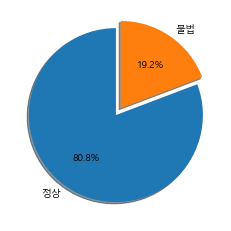

In [61]:
y1_legend = ['정상','불법']
explode = (0, 0.1)
plt.pie(y1_count, labels=y1_legend, autopct ='%0.1f%%', explode=explode, shadow=True, startangle=90)
plt.show()

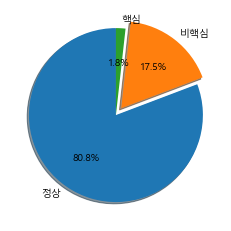

In [62]:
y2_legend = ['정상','비핵심','핵심']
explode = (0, 0.1, 0)
plt.pie(y2_count, labels=y2_legend, autopct ='%0.1f%%', explode=explode, shadow=True, startangle=90)
plt.show()

In [63]:
df_ano.to_csv('./data_syn/df_syn_ano_01.csv', index=False, encoding='utf-8-sig')

In [65]:
df_ano.shape

(3000, 22)